   Study Hours  Attendance  Pass
0            5          80     1
1            8          90     1
2            2          50     0
3            9          95     1
4            7          85     1

Missing values:
 Study Hours    0
Attendance     0
Pass           0
dtype: int64

Summary stats:
        Study Hours  Attendance       Pass
count    20.000000   20.000000  20.000000
mean      5.500000   74.350000   0.600000
std       2.946898   18.146408   0.502625
min       1.000000   40.000000   0.000000
25%       3.000000   59.500000   0.000000
50%       5.500000   76.500000   1.000000
75%       8.000000   89.250000   1.000000
max      10.000000   99.000000   1.000000


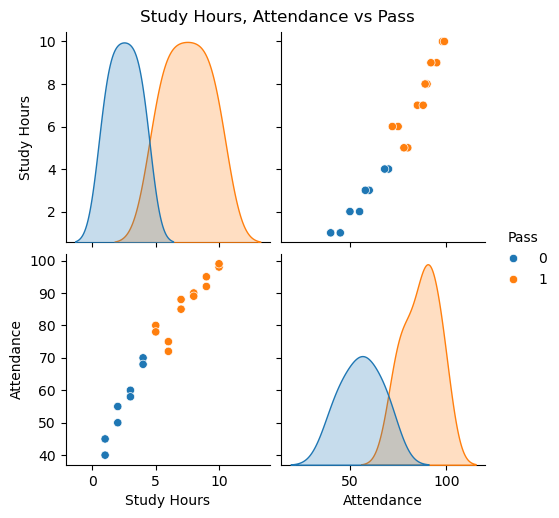

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Academics/3rd Year/5th Sem/Academic Related Docs/Junaid's Intership Tasks/Task 05/DataBase- for Task05/student_performance.csv")

print(df.head())

print("\nMissing values:\n", df.isnull().sum())
print("\nSummary stats:\n", df.describe())

sns.pairplot(df, hue="Pass")
plt.suptitle("Study Hours, Attendance vs Pass", y=1.02)
plt.show()

### Step 1: Data Exploration

Loaded the dataset and checked for missing values or outliers.  
Plotted Study Hours, Attendance vs Pass to visualize patterns.

From the chart, it's clear that students with more study hours and higher attendance tend to pass.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[['Study Hours', 'Attendance']]
y = df['Pass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### Step 2: Logistic Regression Model

Trained a Logistic Regression model using Study Hours and Attendance to predict Pass or Fail.


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


Accuracy: 1.0


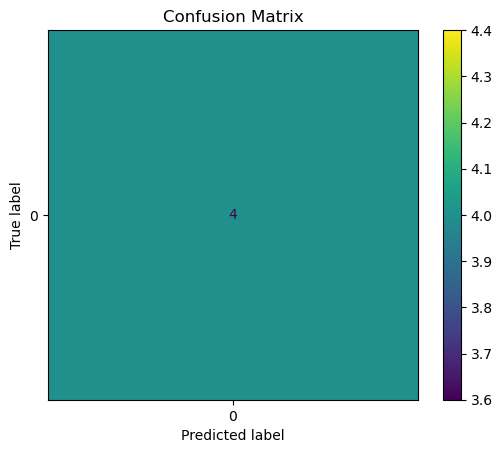

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()


### Step 3: Model Evaluation

Evaluated the model using Accuracy and a Confusion Matrix.

The confusion matrix breaks down predictions into:
- True Positives (TP)
- True Negatives (TN)
- False Positives (FP)
- False Negatives (FN)

Accuracy tells us how often the model predicts correctly.


In [8]:
import pandas as pd

df = pd.read_csv("C:/Users/DELL/OneDrive/Desktop/Academics/3rd Year/5th Sem/Academic Related Docs/Junaid's Intership Tasks/Task 05/DataBase- for Task05/sentiment_data.csv")


print(df.head())
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Sentiment'].value_counts())


                              Review Sentiment
0              The product is great!  Positive
1      Very disappointing experience  Negative
2         Loved it, would buy again.  Positive
3      Worst quality I've ever seen.  Negative
4  Amazing service and fast delivery  Positive

Missing values:
 Review       0
Sentiment    0
dtype: int64

Class distribution:
 Sentiment
Positive    5
Negative    5
Name: count, dtype: int64


### Step 1: Load and Explore Sentiment Dataset

I loaded a small dataset of customer reviews labeled as Positive or Negative.

I checked for missing values and class distribution to ensure data is balanced.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Review'])
y = df['Sentiment']


### Step 2: TF-IDF Vectorization

I used `TfidfVectorizer` to convert text reviews into numeric vectors.

This helps the model understand which words are important across reviews.


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2


Confusion Matrix:
 [[1 0]
 [1 0]]


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Step 3: Model Training and Evaluation

I trained a Logistic Regression model to classify reviews as Positive or Negative.

Used:
- Accuracy
- Classification Report
- Confusion Matrix

This showed how well the model distinguishes between the two classes.
